In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import ClusterCentroids
from collections import Counter
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [2]:
df = pd.read_csv("Modelar_UH2020.txt", sep = "|")

df.dropna(inplace = True)
print(f"Nº de resgistros nulos: {df.isnull().sum().max()}")
print("\n")

df["CADASTRALQUALITYID"].replace("A", 10, inplace = True)
df["CADASTRALQUALITYID"].replace("B", 11, inplace = True)
df["CADASTRALQUALITYID"].replace("C", 12, inplace = True)
print(f"Valores únicos en CADASTRALQUALITYID: {df.CADASTRALQUALITYID.unique()}")
print("\n")
print(f"CLASES: {df.CLASE.unique()}")
df.CLASE = pd.Categorical(df.CLASE)
df.CLASE = df.CLASE.cat.codes
print(f"CLASE en numérico: {df.CLASE.unique()}")
print("\n")
#Chequeo de "no balanceo"
print("Nº de observaciones por CLASE")
print(df["CLASE"].value_counts())

df.drop(df[["ID"]], axis = "columns", inplace = True)
train_df, test_df = train_test_split(df, test_size=0.2)
#train_df, val_df = train_test_split(train_df, test_size=0.3)

print("\n")
num_min = min(train_df["CLASE"].value_counts())
print(f"Nº de observaciones mínimo por clase: {num_min}")
print(train_df["CLASE"].value_counts())

# Form np arrays of labels and features.
train_y = np.array(train_df.pop('CLASE'))
#bool_train_labels = train_labels != 0
test_y = np.array(test_df.pop('CLASE'))

train_X = np.array(train_df)
test_X = np.array(test_df)

Nº de resgistros nulos: 0


Valores únicos en CADASTRALQUALITYID: ['2' '8' '5' '6' '4' '7' '3' 12 '1' '9' 11 10]


CLASES: ['RESIDENTIAL' 'INDUSTRIAL' 'PUBLIC' 'OFFICE' 'OTHER' 'RETAIL'
 'AGRICULTURE']
CLASE en numérico: [5 1 4 2 3 6 0]


Nº de observaciones por CLASE
5    90173
1     4486
4     2976
6     2092
2     1828
3     1332
0      323
Name: CLASE, dtype: int64


Nº de observaciones mínimo por clase: 256
5    72199
1     3567
4     2389
6     1689
2     1441
3     1027
0      256
Name: CLASE, dtype: int64


In [3]:
df.head()

,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,Q_R_4_0_7,...,Q_NIR_8_1_0,AREA,GEOM_R1,GEOM_R2,GEOM_R3,GEOM_R4,CONTRUCTIONYEAR,MAXBUILDINGFLOOR,CADASTRALQUALITYID,CLASE
0,2207357872,165920300,0.000000,443.001300,616.001697,746.998401,872.996472,1009.000946,1159.002319,1342.002466,...,10951.926645,144.426900,0.557237,0.067249,0.057372,0.853127,2002,0.0,2,5
1,2189757160,165463267,0.000059,443.899011,627.999060,770.001611,904.999988,1032.998474,1165.001636,1316.000110,...,7048.367637,38.342550,0.709884,0.125156,0.147929,1.181953,1949,1.0,8,5
2,2240147335,165690752,0.000000,353.502274,523.003601,644.001831,760.997131,876.999634,1006.997498,1168.995544,...,7013.073271,108.794384,0.517702,0.058268,0.081666,1.401552,1986,1.0,5,5
3,2227146459,165934099,0.000000,268.000613,376.999609,478.003784,575.001233,683.997742,809.005994,955.002960,...,6216.880538,155.224455,0.450871,0.053591,0.054201,1.011382,1999,1.0,2,5
4,2212350459,165681791,0.000000,318.997910,492.003845,632.999634,757.002197,882.999908,1019.008911,1175.993103,...,7092.767616,1789.873366,0.458819,0.012858,0.019936,1.550478,1966,8.0,6,5


In [4]:
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)

test_X = scaler.transform(test_X)

train_X = np.clip(train_X, -5, 5)
test_X = np.clip(test_X, -5, 5)


print('Training labels shape:', train_y.shape)
print('Test labels shape:', test_y.shape)

print('Training features shape:', train_X.shape)
print('Test features shape:', test_X.shape)

Training labels shape: (82568,)
Test labels shape: (20642,)
Training features shape: (82568, 54)
Test features shape: (20642, 54)


## OVERSAMPLING
###### SMOTE

In [5]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE

In [6]:
#train_X1, train_y1 = SMOTE().fit_resample(train_X, train_y)
#test_X1, test_y1 = SMOTE().fit_resample(test_X, test_y)

###### Random

In [7]:
train_X2, train_y2 = RandomOverSampler().fit_resample(train_X, train_y)
test_X2, test_y2 = RandomOverSampler().fit_resample(test_X, test_y)

In [ ]:
from sklearn.manifold import Isomap,TSNE
sne=TSNE(n_components=2)
x_red_sne=sne.fit_transform(train_X2)


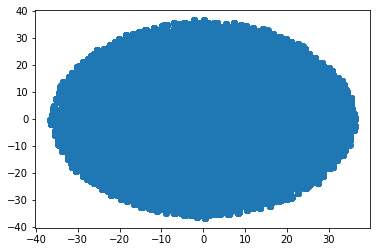

In [33]:
plt.scatter(x=x_red_sne[:,0],y=x_red_sne[:,1],cmap='spectral')

### Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
model_dt= DecisionTreeClassifier()
#learning
model_dt.fit(train_X2,train_y2)
#Prediction
dt_y_pred=model_dt.predict(test_X2)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(dt_y_pred,test_y2))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(dt_y_pred,test_y2))

Accuracy: 0.43659889681921504
Confusion Metrix:
 [[10148   187     0    57    70    11    41]
 [ 3222 10003  2857  1057  1279   270  1458]
 [  262  1020  3472   643   795   209   736]
 [  282   229   291  5960   785    78   502]
 [  803   969   940  1492  4240   317  1129]
 [ 3257  4819  9611  8180  9877 16845  9844]
 [    0   747   803   585   928   244  4264]]


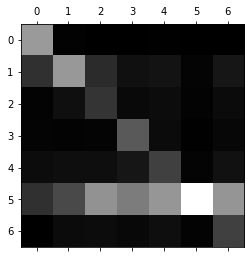

In [10]:
import matplotlib.pyplot as plt

plt.matshow(metrics.confusion_matrix(dt_y_pred,test_y2), cmap=plt.cm.gray)
plt.show()

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
#Hiperparametros

params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}
#Making models with hyper parameters sets
model_dt = GridSearchCV(model_dt, param_grid=params, n_jobs=-1)
#Learning
model_dt.fit(train_X2,train_y2)

#The best hyper parameters set
print("Best Hyper Parameters:",model_dt.best_params_)
#Prediction
prediction=model_dt.predict(test_X2)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(dt_y_pred,test_y2))
#evaluation(Confusion Metrix)
print("Confusion Matrix:\n",metrics.confusion_matrix(dt_y_pred,test_y2))

Best Hyper Parameters: {'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 7, 'random_state': 123}
Accuracy: 0.43659889681921504
Confusion Metrix:
 [[10148   187     0    57    70    11    41]
 [ 3222 10003  2857  1057  1279   270  1458]
 [  262  1020  3472   643   795   209   736]
 [  282   229   291  5960   785    78   502]
 [  803   969   940  1492  4240   317  1129]
 [ 3257  4819  9611  8180  9877 16845  9844]
 [    0   747   803   585   928   244  4264]]


In [ ]:
model_dt1= DecisionTreeClassifier(max_features= 'auto',
                                 min_samples_leaf= 1,
                                 min_samples_split= 7,
                                 random_state= 123)

model_dt1.fit(train_X2,train_y2)
#Prediction
dt_y_pred=model_dt1.predict(test_X2)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(dt_y_pred,test_y2))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(dt_y_pred,test_y2))

### KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(train_X2,train_y2)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

In [ ]:
best_model.best_score_

In [ ]:
best_model

In [ ]:
#Meto los parámetros obtenidos
classifier = KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform')
classifier.fit(train_X2, train_y2)
label_pred = classifier.predict(test_X2)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [ ]:
cm = confusion_matrix(train_y2, label_pred)
print(cm)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Estrategia 1

In [ ]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(train_X2, train_y2)

In [ ]:
model_rf=RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
#learning
model_rf.fit(train_X2,train_y2)
#Prediction
pred_rf=model_rf.predict(test_X2)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(pred_rf,test_y2))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(pred_rf,test_y2))

In [ ]:
model_rf1=RandomForestClassifier()
#hyper parameters set
params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}
#Making models with hyper parameters sets
model_rf1 = GridSearchCV(model_rf, param_grid=params, n_jobs=-1)
#learning
model_rf1.fit(train_X2,train_y2)
#The best hyper parameters set
print("Best Hyper Parameters:\n",model_rf1.best_params_)
#Prediction
prediction_rf1=model_rf1.predict(test_X2)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction_rf1,test_y2))
#evaluation(Confusion Metrix)
print("Confusion Metrix:\n",metrics.confusion_matrix(prediction_rf1,test_y2))

### Gradient Boosting

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_clf = XGBClassifier()
xgb_clf.fit(train_X2, train_y2)

In [ ]:
score = xgb_clf.score(test_X2, test_y2)
print(score)

In [ ]:
xg_reg = XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(train_X2,train_y2)

preds = xg_reg.predict(test_X2)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(test_y2, preds))

In [ ]:
cm_test = confusion_matrix(test_y2, preds)
print(cm_test)

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)